<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Segmentación por clustering. Caso EM</h2>

### Mixtura de Gausianas - Expectación Maximización (EM)
#### Author: Pedro Latorre Carmona
#### Curso: 2024-2025

Versión 1.0

---

En esta práctica, la idea es aplicar el algoritmo de agrupamiento de EM a una imagen sin ruido, y a otra imagen a la que le vais a añadir ruido Gausiano de un determinado valor de *desviación estándar*.


### Mixtura de Gausianas (Mixture of Gaussians, o MoGs)

El algoritmo de mixtura de Gausianas intenta resolver e inferir cuáles son las características, número y peso de un conjunto de Gausianas, en un espacio $D-$dimensional que permitirían modelizar una determinada distribución de datos.

Supongamos un **vector de características** que representa un dato que queremos clasificar. La distribución de probabilidad de ese vector de características a lo largo del espacio que lo define se puede poner como:

$p(\mathbf{x}) = \sum_{j=1}^{m} p(\Omega_{j})\cdot p(\mathbf{x}|\Omega_{j})$

Una función Gausiana en un espacio $D-$dimensional puede escribirse de la siguiente forma:

$p(\mathbf{x}|\Omega_{j})=\frac{1}{(2\pi)^{\frac{d}{2}}|\Sigma_{j}|^{\frac{1}{2}}}\exp\left(-\frac{1}{2}([\mathbf{x}-\mathbf{\mu}_{j}]^{T}\Sigma_{j}^{-1}[\mathbf{x}-\mathbf{\mu}_{j}])\right)$

donde:

1. $\mathbf{\mu}_{j}$ es el vector que representa las coordenadas del **centroide** j-ésimo
2. $\Sigma_{j}$ es la matriz de covarianza asociada al *clúster* j-ésimo

## ¿Qué resuelve el algoritmo de mixtura de Gausianas?

Lo que indica es el grupo al que pertenece un vector, $\mathbf{x}$, porque busca:

$j\equiv\max_{j\in\Omega_{i}} \left\{p(\Omega_{j}|\mathbf{x})\right\}$

## Método de resolución

Normalmente, el método que se usa para resolver este problema de optimización es el denominado de **expectación**-**maximización** (**EM**). Consta de dos partes:

1. Paso **E** (Expectación):

<img src="pics/PasoE.png">

2. Paso **M** (Maximización):

<img src="pics/PasoM.png">

## ¿Cuándo *pararía* el algoritmo?

Hay diversas formas de establecer que el algoritmo ha **convergido**:

1. Considerar que los centroides, así como las matrices de covarianza, no han *cambiado*. Esto, en realidad, tendría que reflejarse en que:

$\|\Sigma_{j}^{(t+1)}-\Sigma_{j}^{(t)}\|_{2}\leq \epsilon_{1}, \forall j$

$\|\mathbf{\mu}_{j}^{(t+1)}-\mathbf{\mu}_{j}^{(t)}\|_{2}\leq \epsilon_{2}, \forall j$

Podemos considerar: $\epsilon_{1}=\epsilon_{2}=\epsilon$

2. Hacer un número máximo de iteraciones.

---

- Para el caso de la **Mixtura de Gausianas** habría que analizar:

    1. El número de Gausianas
    2. El valor del umbral de parada
    3. El número de iteraciones
    4. La forma de las matrices de covarianza
    5. El efecto del ruido de la imagen, en la calidad de la segmentación


Hay que usar el código que ya tiene **sklearn.mixture** de **Mixturas de Gausianas**.

---

# Representación 3D de la imgane original en el espacio RGB

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar la imagen proporcionada
image_path = './Imagen-4Grupos-SinRuido-7Nov2024.png'
image = Image.open(image_path)

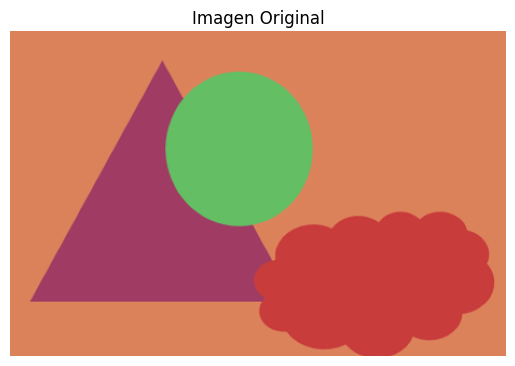

In [3]:
# Mostrar la imagen original
plt.imshow(image)
plt.title("Imagen Original")
plt.axis("off")
plt.show()


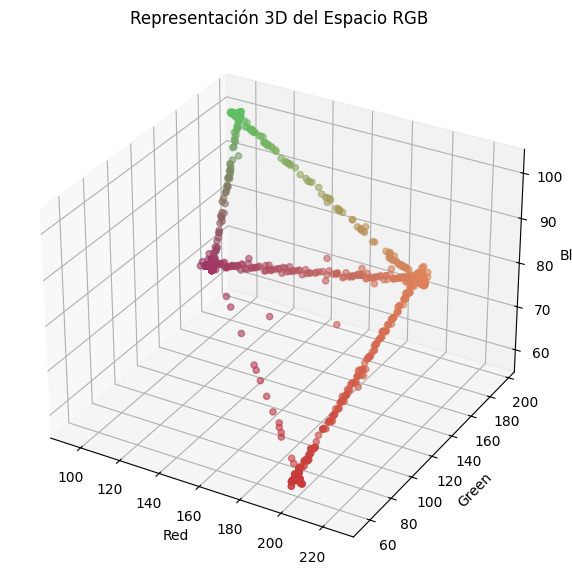

In [4]:
# Redimensionar para facilitar el procesamiento
image_resized = image.resize((100, 100))
pixels = np.array(image_resized)

# Separar los canales R, G, B
r, g, b = pixels[:, :, 0].flatten(), pixels[:, :, 1].flatten(), pixels[:, :, 2].flatten()

# Crear un gráfico 3D del espacio RGB
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos RGB
ax.scatter(r, g, b, c=np.array([r, g, b]).T / 255, marker='o', alpha=0.6)

# Etiquetas y configuraciones
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.set_title("Representación 3D del Espacio RGB")

plt.show()

## PUEBA DE SEGMANETACIÓN

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D


In [6]:
# 1. Cargar la imagen
imagen = Image.open('./Imagen-4Grupos-SinRuido-7Nov2024.png')
imagen = imagen.convert('RGB')
datos = np.array(imagen)



In [7]:
# 2. Preparar los datos RGB
R = datos[:, :, 0].flatten()
G = datos[:, :, 1].flatten()
B = datos[:, :, 2].flatten()
X = np.vstack((R, G, B)).T  # Forma: (n_píxeles, 3)

In [8]:
# 3. Aplicar el algoritmo EM (GMM)
n_clusters = 5  # Puedes cambiar este valor
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
colores = gmm.means_.astype(int)

In [9]:
# 4. Crear la imagen cuantizada
X_colored = colores[labels]
imagen_coloreada = X_colored.reshape(datos.shape)
imagen_coloreada = Image.fromarray(imagen_coloreada.astype('uint8'), 'RGB')
imagen_coloreada.save('imagen_cuantizada.jpg')
imagen_coloreada.show()

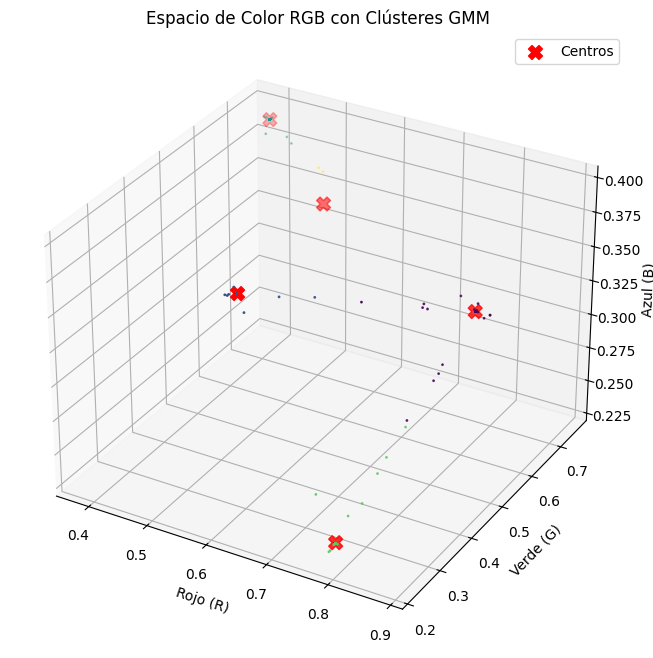

In [10]:
# 5. Visualizar los clústeres en el espacio RGB 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalizar los valores RGB
R_norm = X[:, 0] / 255
G_norm = X[:, 1] / 255
B_norm = X[:, 2] / 255

# Reducir el número de puntos para mejorar el rendimiento
factor_muestreo = 100  # Ajusta según tus necesidades
indices = np.random.choice(len(R_norm), len(R_norm) // factor_muestreo, replace=False)
R_muestra = R_norm[indices]
G_muestra = G_norm[indices]
B_muestra = B_norm[indices]
labels_muestra = labels[indices]
colores_muestra = X[indices] / 255

# Graficar los puntos con colores según los clústeres
scatter = ax.scatter(R_muestra, G_muestra, B_muestra, c=labels_muestra, cmap='viridis', marker='o', s=1)

# Añadir los centros de los clústeres
centros = gmm.means_ / 255
ax.scatter(centros[:, 0], centros[:, 1], centros[:, 2], c='red', marker='X', s=100, label='Centros')

# Etiquetas de los ejes
ax.set_xlabel('Rojo (R)')
ax.set_ylabel('Verde (G)')
ax.set_zlabel('Azul (B)')

# Título del gráfico
ax.set_title('Espacio de Color RGB con Clústeres GMM')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

---
### Adición de ruido Gausiano

Para añadir ruido Gausiano, podéis hacerlo de forma independiente en cada canal de color (R, G, B), siguiendo lo comentado (por ejemplo) en:

https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524


In [11]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util
from sklearn.mixture import GaussianMixture


In [8]:

def add_gaussian_noise(image, std_dev, mean=0):
    # Añadir ruido gaussiano utilizando skimage
    noisy_image = util.random_noise(image, mode='gaussian', mean=mean, var=(std_dev/255)**2)
    return noisy_image


In [9]:
# Función para añadir ruido gaussiano
def add_gaussian_noise2(image, sigma):
    # Añadir ruido gaussiano mediante suma directa de ruido normal
    noisy = image + sigma * np.random.randn(*image.shape)
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [10]:
# Function to segment the image using Gaussian Mixture Model (EM algorithm)
def segment_image(image, n_components=4, max_iter=100):
    # Convertir la imagen a escala de grises
    grayscale_image = color.rgb2gray(image)
    pixels = grayscale_image.reshape(-1, 1)
    
    # Ajustar GMM
    gmm = GaussianMixture(n_components=n_components, max_iter=max_iter, random_state=0)
    gmm.fit(pixels)
    segmented = gmm.predict(pixels)
    
    # Reconvertir a la forma original
    segmented_image = segmented.reshape(grayscale_image.shape)
    return segmented_image


In [11]:
# Representación 3D del espacio RGB
# Función para graficar el espacio RGB en 3D
from mpl_toolkits.mplot3d import Axes3D  # Si es necesario para el entorno actual

def plot_rgb_3d(image, ax):
    r, g, b = image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten()
    colors = np.array([r, g, b]).T / 255
    ax.scatter(r, g, b, c=colors, marker='o', alpha=0.6)
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title("Espacio RGB")


In [12]:
def plot_rgb_3d2(image):
    # Extraer los canales R, G, B
    r, g, b = image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten()

    # Crear un gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(r, g, b, c=np.array([r, g, b]).T / 255, marker='o', alpha=0.6)

    # Etiquetas y configuraciones
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title("Espacio RGB")


In [13]:
def compute_accuracy(ground_truth, predicted):
    # Calcula la proporción de píxeles donde ground_truth y predicted coinciden
    return np.mean(ground_truth == predicted)

In [14]:
image_path = './Imagen-4Grupos-SinRuido-7Nov2024.png'
image = io.imread(image_path)

noisy_images = [
    add_gaussian_noise2(image, 1),
    add_gaussian_noise2(image, 5),
    add_gaussian_noise2(image, 10),
]


In [15]:
segmented_original = segment_image(image, n_components=4)
segmented_images = [segment_image(noisy, n_components=4) for noisy in noisy_images]


In [16]:
ground_truth = segmented_original
accuracies = [compute_accuracy(ground_truth, seg) for seg in segmented_images]


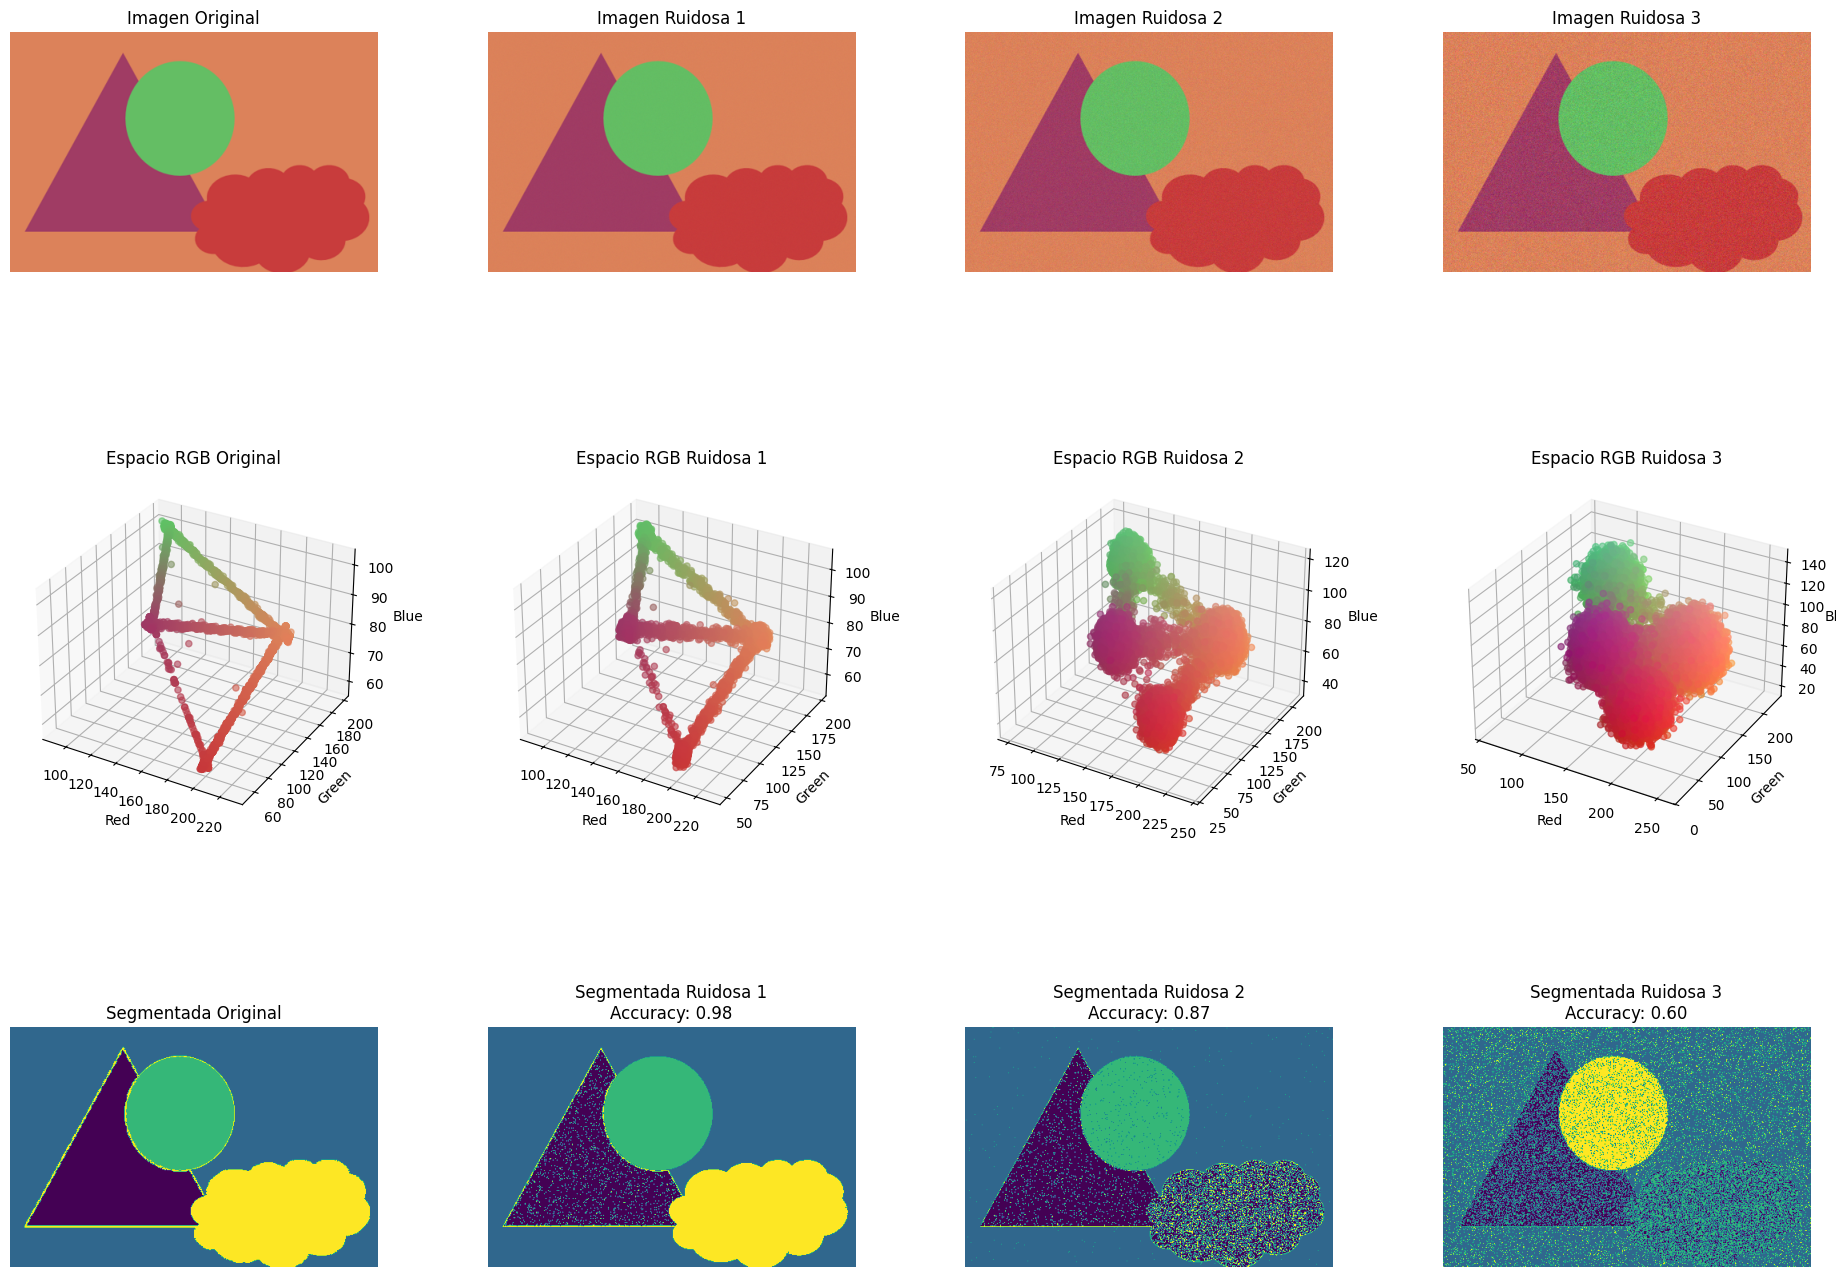

In [17]:
fig = plt.figure(figsize=(20, 15))

# Primera fila: Imágenes originales y ruidosas
for i, img in enumerate([image] + noisy_images):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(img)
    ax.axis('off')
    if i == 0:
        ax.set_title("Imagen Original")
    else:
        ax.set_title(f"Imagen Ruidosa {i}")

# Segunda fila: Gráficos 3D del espacio RGB
for i, img in enumerate([image] + noisy_images):
    ax = fig.add_subplot(3, 4, i + 5, projection='3d')
    plot_rgb_3d(img, ax)
    if i == 0:
        ax.set_title("Espacio RGB Original")
    else:
        ax.set_title(f"Espacio RGB Ruidosa {i}")

# Tercera fila: Imágenes segmentadas con exactitud
for i, img in enumerate([segmented_original] + segmented_images):
    ax = fig.add_subplot(3, 4, i + 9)
    ax.imshow(img)
    ax.axis('off')
    if i == 0:
        ax.set_title("Segmentada Original")
    else:
        # Añadir la exactitud al título
        ax.set_title(f"Segmentada Ruidosa {i}\nAccuracy: {accuracies[i-1]:.2f}")

plt.subplots_adjust(
    left=0.05,
    right=0.95,
    top=0.95,
    bottom=0.05,
    wspace=0.3,
    hspace=0.4
)

plt.show()


### Discusión de Resultados

Los resultados obtenidos muestran de manera clara el efecto del ruido gaussiano sobre la segmentación por medio de modelos de mezclas gaussianas (GMM):

1. **Imagen original vs. imágenes ruidosas:**  
   La imagen original presenta regiones cromáticamente homogéneas, lo que facilita la separación en grupos. Conforme se añade ruido, las superficies adquieren una apariencia granular y se dificulta la diferenciación entre los objetos, ya que los valores de los píxeles se dispersan.

2. **Representación en el espacio RGB:**  
   Al analizar la distribución de los píxeles en el espacio RGB, se observa que, en la imagen original, los colores de cada objeto forman clusters bien definidos. Sin embargo, al incrementar el ruido, estas nubes de puntos se vuelven más difusas y menos distinguibles entre sí, lo que anticipa una segmentación menos precisa.

3. **Calidad de la segmentación y exactitud (Accuracy):**  
   La segmentación de la imagen original o con bajo nivel de ruido conserva la precisión casi intacta, presentando valores cercanos al 98% de acierto. Esto indica que el modelo GMM es capaz de identificar correctamente la mayor parte de las regiones.  
   A medida que el ruido aumenta, la exactitud disminuye: con un nivel de ruido moderado (por ejemplo, σ=5), la precisión puede caer hasta alrededor del 87%. En este caso, la segmentación se muestra más irregular, con la presencia de píxeles mal clasificados en las diferentes regiones.  
   Con un nivel de ruido aún mayor (σ=10), la exactitud puede llegar a valores tan bajos como el 60%. Esta baja precisión refleja la dificultad del GMM para separar correctamente las distintas partes de la imagen, debido a la pérdida de diferencias cromáticas significativas.

**Conclusión:** Los resultados evidencian que la segmentación mediante GMM es robusta ante niveles bajos de ruido, pero se ve seriamente afectada cuando el ruido es alto. Esto se debe a la dificultad para encontrar clusters cromáticos claramente diferenciados a medida que las distribuciones de color se solapan por la presencia de ruido. Así, la calidad de la segmentación se degrada notablemente al incrementar la perturbación en la imagen.


In [19]:
# TODO incluir ruido gausiano a la imagen
# TODO habrá que aplicar el metodo de segmentación con diferentes números de clusters (4 clusters, q son 4 colores) (matriz de covarianza completa) para aplicar  EM con diferentes parametros (nº gausianas, parametros de las diagonales de la matriz de covarianza, )
# TODO discutir los resultados obtenidos importante para la nota
# TODO buena presentación de los resultados
# TODO mosiaco de imagenes con los resultados al variar los parámetros

In [ ]:
#TODO 1. con la imagen original aplicar ruido y obtener otras 3
#TODO 2. realizar una representación 3D de cda una de las imagenes en el espacio RGB
#TODO 3. aplicar algoritmo EM
#TODO 4. recuperamos la matriz de etiquetas y aplicamos un color a cada una de las etiquetas
#TODO 5. Ver la tasa de acierto en cada imagen 
#TODO 6. visualización de cada uno de los pasos y sus resultados en modo mosaico para poder comparar y comentar los resultados. 

: 